$\log L_X=\beta+\gamma\log L_{UV}$  
$L_X$--X-ray,$L_{UV}$--rest-frame ultraviolet

$\beta=\beta_0+\beta_1(1+z),\gamma=\gamma_0+\gamma_1(1+z)$

$\log(F_X)=\beta+(\gamma-1)\log(4\pi)+\gamma\log(F_{UV})+2(\gamma-1)\log(d_L/m)$  
$\log=\log_{10}$

$DM(z)=\dfrac{5}{2(\gamma-1)}[\log(F_X)-\gamma\log(F_{UV})-\beta']$  
$\beta'=\beta+(\gamma-1)\log(4\pi)$

$DM(z)=5\log(d_L(z)/Mpc)+25$

$\ln (\mathcal{L}) = -\dfrac{1}{2}\sum\biggl\{ \dfrac{{{{\left [ {{{\log }_{10}}{{({F_{X}})}_{i}} - \Phi ({{[{F_{UV}}]}_{i}},{d_{L}}[{z_{i}}])} \right ]}^{2}}}}{{\tilde{\sigma}_{i}^{2}}}+ \ln (2\pi \tilde{\sigma}_{i}^{2})\biggr\}$  
$\tilde{\sigma}_{i}^{2} \equiv {\delta ^{2}} + \sigma _{i}^{2}$

In [2]:
import numpy as np

# file_path = "./QSO/data/table3.dat"
file_path = "./data/table3.dat"
data = np.loadtxt(file_path, skiprows=1, usecols=(3,4,5,6,7,11,12))
z = data[:,0]
logFUV = data[:,1]
e_logFUV = data[:,2]
logFX = data[:,3]
e_logFX = data[:,4]
DM = data[:,5]
e_DM = data[:,6]

In [3]:
import sys
sys.path.append("../")
from solution import solution, const_c

In [4]:
def DM_z(log_kC1, O20, H0):
    t0 = 1 / H0
    t_values = solution(log_kC1, O20, H0).t
    z_values = solution(log_kC1, O20, H0).y[0, :]
    dl_values = []

    for z_value in z:
        idx = np.searchsorted(z_values, z_value)
        if idx >= len(z_values):  
            idx = len(z_values) - 1
        int_value = -np.trapz(z_values[:idx], t_values[:idx])
        dl_value = const_c * (1 + z_value) * (t0 - t_values[idx] + int_value)
        dl_values.append(dl_value)

    dl = np.array(dl_values)
    muth = 5 * np.log10(dl) + 25
    return muth

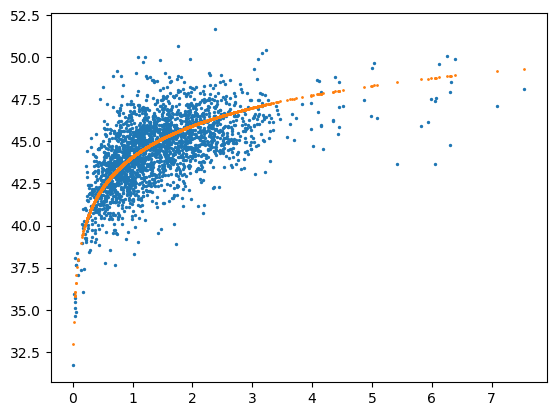

In [5]:
# dm from data
import matplotlib.pyplot as plt
plt.scatter(z, DM, s=2)
plt.scatter(z, DM_z(-3,0.3,70), s=1)
plt.show()

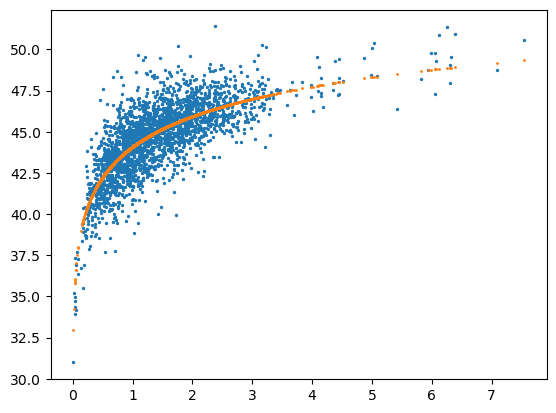

In [21]:
# dm in paper
import astropy.units as u
transform = np.log10(u.Mpc.to(u.m))
beta = 5.19 + 0.88 * (1+z)
gamma = 0.647 - 0.0292 * (1+z)
dm_th = 5/2/(gamma-1)*(logFX-gamma*logFUV-beta-(gamma-1)*np.log10(4*np.pi))
dm_th = dm_th - 5*transform +25
dm_err = -5/2/(gamma-1)*np.sqrt(e_logFX**2 + gamma**2 * e_logFUV**2)

np.savetxt("./data/dm.dat", np.array([z, dm_th, dm_err]).T)

plt.scatter(z, dm_th, s=2)
plt.scatter(z, DM_z(-3,0.3,70), s=1)
plt.show()

100%|██████████| 2500/2500 [25:39<00:00,  1.62it/s]


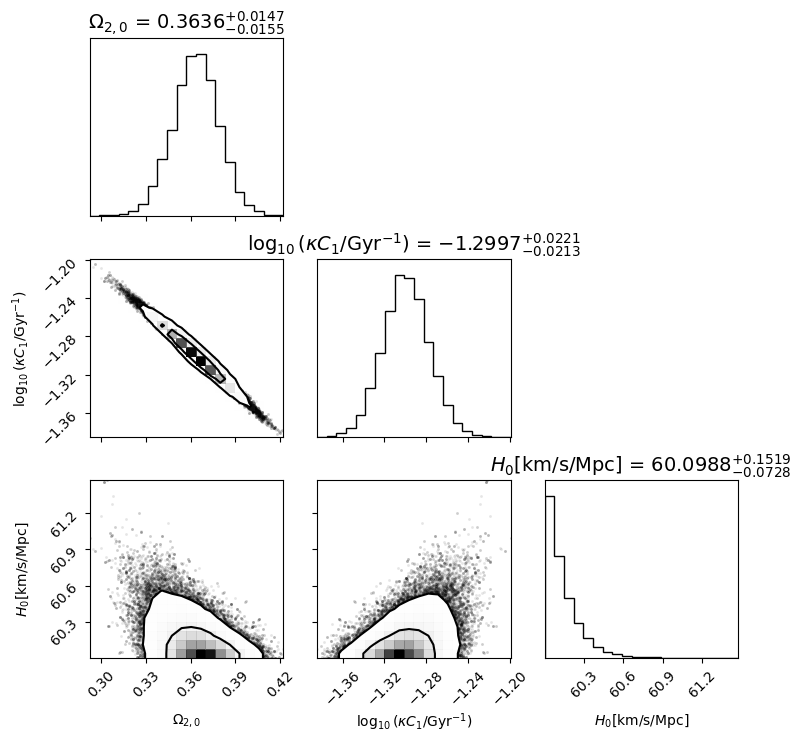

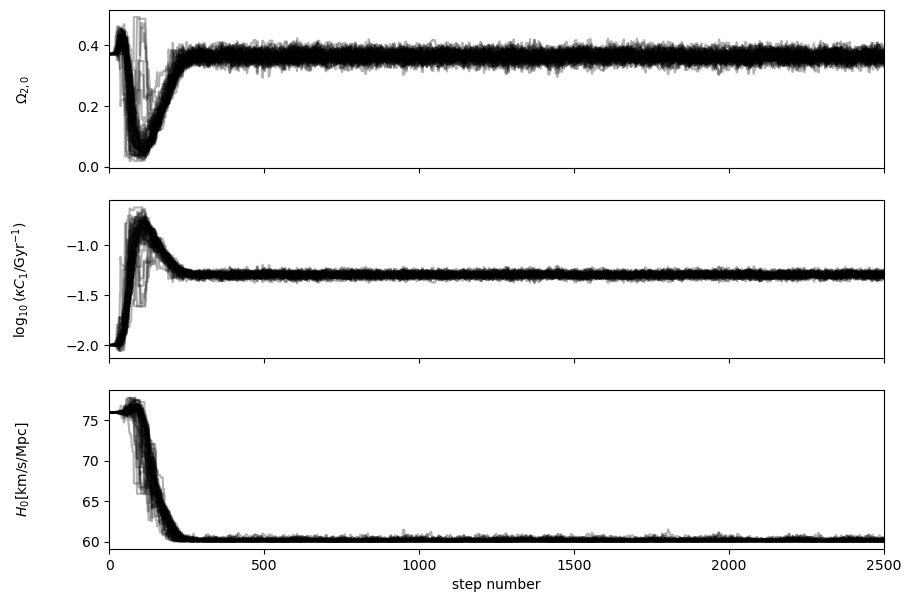

In [1]:
import multiprocessing as mp
from qso_test import main

if __name__ == '__main__':
    mp.freeze_support()
    main()

In [13]:
def logFX_z(log_kC1, O20, H0, beta, gamma):
    t0 = 1 / H0
    t_values = solution(log_kC1, O20, H0).t
    z_values = solution(log_kC1, O20, H0).y[0, :]
    dl_values = []

    for z_value in z:
        idx = np.searchsorted(z_values, z_value)
        if idx >= len(z_values):  
            idx = len(z_values) - 1
        int_value = -np.trapz(z_values[:idx], t_values[:idx])
        dl_value = const_c * (1 + z_value) * (t0 - t_values[idx] + int_value)
        dl_values.append(dl_value)

    import astropy.units as u
    transform = u.Mpc.to(u.m)
    dl = np.array(dl_values) * transform
    return beta+(gamma-1)*np.log10(4*np.pi)+gamma*logFUV+2*(gamma-1)*np.log10(dl)

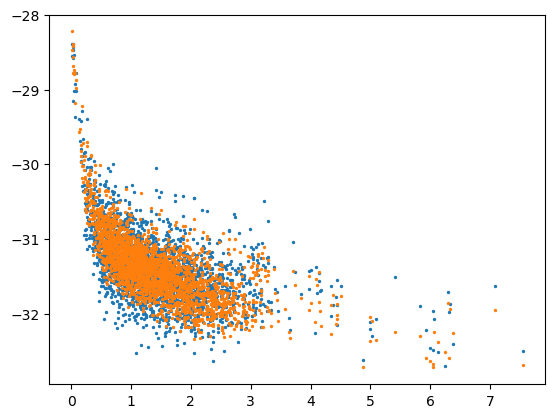

In [16]:
import matplotlib.pyplot as plt
plt.scatter(z, logFX, s=2)
plt.scatter(z, logFX_z(-4,0.3,70,6.7,0.6), s=2)
plt.show()